In [2]:
# Importing the dependancies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


#loading the dataset and processing

titanic_data = pd.read_csv('train.csv')
#displaying the dataframe
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# checking the number of rows adn columns the dataset has
titanic_data.shape

(891, 12)

In [4]:
# getting more information about the dta
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# checkiing the number of missing values are missing in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
# handling the missing values
#By dropping the "Cabin" column from the dataframe since a lot of the values are missing
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

In [43]:
#replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [44]:
#finding the mode value of the "Embarked" column
print(titanic_data['Embarked'].mode()[0])

0.0


In [45]:
# replacing the missing values in the "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [46]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1]:
# getting some statistical measures about the data
titanic_data.describe()
titanic_data.info()

NameError: name 'titanic_data' is not defined

In [48]:
# finding the number of people who survived and not survived
titanic_data['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

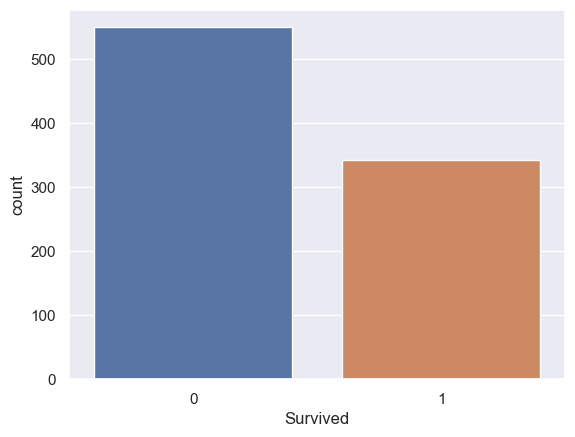

In [49]:
#Data visualization
sns.set()
#making a count plot for "Survived" column
sns.countplot(data=titanic_data, x='Survived')

<Axes: xlabel='Sex', ylabel='count'>

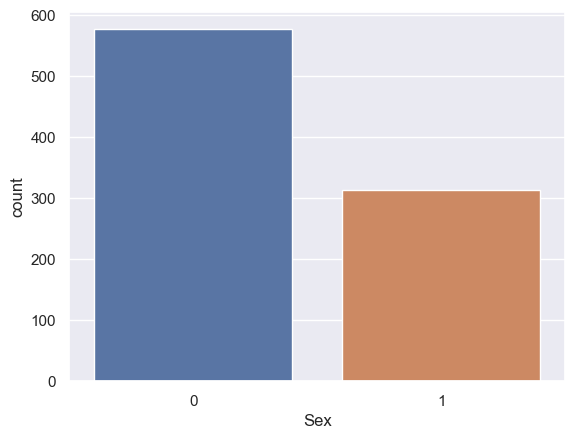

In [50]:
#making a count plot for "Sex" column
titanic_data['Sex'].value_counts()
sns.countplot(data=titanic_data, x='Sex')

<Axes: xlabel='Sex', ylabel='count'>

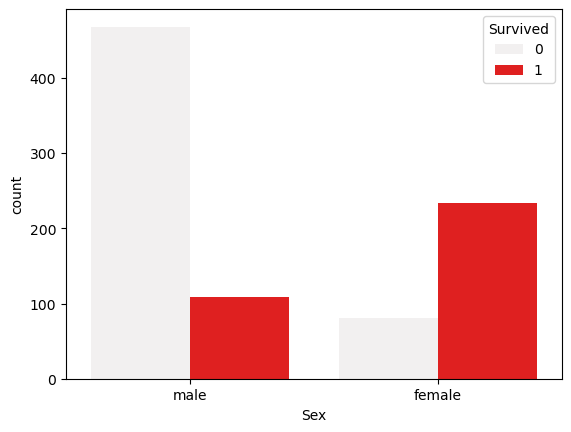

In [6]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived',color = 'red', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

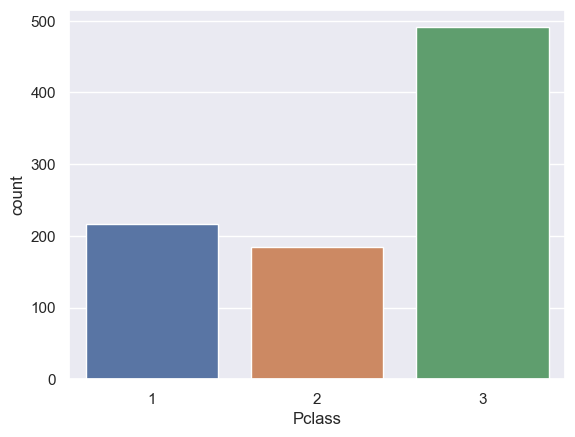

In [52]:
#making a count plot for "Pclass" column
sns.countplot(data=titanic_data, x='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

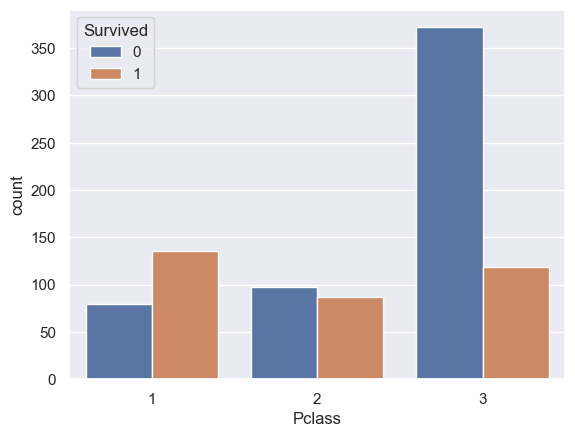

In [53]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [54]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [55]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [56]:
#Encoding the catagorial columns to numerical values because computers understand values better than strings
titanic_data['Sex'].value_counts()



Sex
0    577
1    314
Name: count, dtype: int64

In [57]:
titanic_data['Embarked'].value_counts()

Embarked
0.0    646
1.0    168
2.0     77
Name: count, dtype: int64

In [58]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [59]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


In [60]:
# Separating features & target
X = titanic_data.drop(columns= ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [61]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500       0.0
1         1    1  38.000000      1      0  71.2833       1.0
2         3    1  26.000000      0      0   7.9250       0.0
3         1    1  35.000000      1      0  53.1000       0.0
4         3    0  35.000000      0      0   8.0500       0.0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000       0.0
887       1    1  19.000000      0      0  30.0000       0.0
888       3    1  29.699118      1      2  23.4500       0.0
889       1    0  26.000000      0      0  30.0000       1.0
890       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 7 columns]


In [62]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [63]:
#Splitting the data into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [64]:
# Model trainnig (Logistic regression)
model = LogisticRegression()
#decision tree
#model2 = 

#training the logistic regression model with training data
model.fit(X_train, Y_train)


C:\Users\vutom\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
# model evaluation using Accuracy score
X_train_prediction = model.predict(X_train)


In [69]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [70]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8075842696629213


In [71]:
#accuracy score on the test data
# model evaluation using Accuracy score
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [72]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7821229050279329
